In [1]:
import mdtraj as md
import numpy as np
import pickle
import os
from tqdm import tqdm_notebook
from simtk.openmm import app
from simtk.openmm import unit
import matplotlib.pyplot as plt
from openeye import oechem

## Load htf for analysis (with water sampling)

In [2]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/15/79"
outdir_rest = "/data/chodera/zhangi/perses_benchmark/neq/14/79"
i = 79
phase = 'complex'
cycle = 0


In [3]:
htf = pickle.load(open(os.path.join(outdir, f"{i}_{phase}.pickle"), "rb"))


In [4]:
def new_positions(hybrid_positions):
    n_atoms_new = htf._topology_proposal.n_atoms_new
    hybrid_indices = [htf._new_to_hybrid_map[idx] for idx in range(n_atoms_new)]
    return hybrid_positions[hybrid_indices, :]
    
def old_positions(hybrid_positions):
    n_atoms_old = htf._topology_proposal.n_atoms_old
    hybrid_indices = [htf._old_to_hybrid_map[idx] for idx in range(n_atoms_old)]
    return hybrid_positions[hybrid_indices, :]

def make_traj(outdir, htf, i, phase, name, endstate, is_old=True, keep_solvent=False):
    with open(os.path.join(outdir, f"{i}_{phase}_{name}_1ns_snapshots.npy"), "rb") as f:
        cache = np.load(f)
    if is_old:
        old_pos = np.zeros(shape=(100, htf._topology_proposal.old_topology.getNumAtoms(), 3))
        for j, pos in tqdm_notebook(enumerate(cache)):
            old_pos[j] = old_positions(unit.Quantity(pos, unit=unit.nanometers)).value_in_unit_system(unit.md_unit_system)
        
        traj = md.Trajectory(old_pos, md.Topology.from_openmm(htf._topology_proposal.old_topology))
    else:
        new_pos = np.zeros(shape=(100, htf._topology_proposal.new_topology.getNumAtoms(), 3))
        for j, pos in tqdm_notebook(enumerate(cache)):
            new_pos[j] = new_positions(unit.Quantity(pos, unit=unit.nanometers)).value_in_unit_system(unit.md_unit_system)
        
        traj = md.Trajectory(new_pos, md.Topology.from_openmm(htf._topology_proposal.new_topology))
        
    box_vectors = np.array([val.value_in_unit_system(unit.md_unit_system) for val in htf.hybrid_system.getDefaultPeriodicBoxVectors()])
    vectors = np.array([box_vectors]) 
           
    # Set unit cell vectors in traj 
    traj.unitcell_vectors = np.repeat(vectors, 100, axis=0)
    traj.image_molecules(inplace=True)
    
    if not keep_solvent:
        traj = traj.remove_solvent(exclude=['Na+', 'Cl-'])
    
    return traj
       

## Check number of waters within 5 angstroms of N501Y

Y501

In [5]:
name = "tyr"
endstate = 1
is_old = False
traj_rest_solvent = make_traj(outdir_rest, htf, i, phase, name, endstate, is_old, keep_solvent=True)


<ipython-input-4-45ff68d441e7>:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


In [6]:
tyr_atoms = []
for atom in traj_rest_solvent.topology.atoms:
    if atom.residue.resSeq == 501 and atom.residue.name == 'TYR':
        print(atom, atom.residue.resSeq, atom.index)
        tyr_atoms.append(atom.index)

TYR501-N 501 2605
TYR501-H 501 2606
TYR501-CA 501 2607
TYR501-HA 501 2608
TYR501-CB 501 2609
TYR501-HB2 501 2610
TYR501-HB3 501 2611
TYR501-CG 501 2612
TYR501-CD1 501 2613
TYR501-HD1 501 2614
TYR501-CE1 501 2615
TYR501-HE1 501 2616
TYR501-CZ 501 2617
TYR501-OH 501 2618
TYR501-HH 501 2619
TYR501-CE2 501 2620
TYR501-HE2 501 2621
TYR501-CD2 501 2622
TYR501-HD2 501 2623
TYR501-C 501 2624
TYR501-O 501 2625


In [7]:
water_atoms = traj_rest_solvent.topology.select("water and symbol == 'O'")


In [8]:
neighbors = md.compute_neighbors(traj_rest_solvent, 0.5, tyr_atoms, haystack_indices=water_atoms)


(0.0, 10.0)

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager

DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: sc

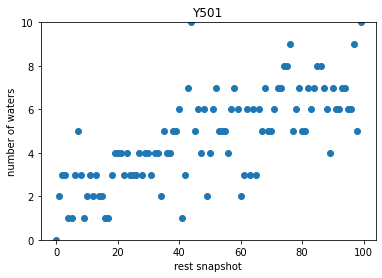

In [9]:
plt.scatter(range(len(neighbors)), [len(frame) for frame in neighbors])
plt.ylabel("number of waters")
plt.xlabel("rest snapshot")
plt.title("Y501")
plt.ylim([0, 10])

In [10]:
from pymbar import timeseries

INFO:numexpr.utils:Note: detected 80 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 80 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [11]:
y501_waters = [len(frame) for frame in neighbors]


In [12]:
timeseries.statisticalInefficiency(y501_waters)


18.69224971952749

N501

In [13]:
name = "asn"
endstate = 0
is_old = True
traj_rest_solvent_old = make_traj(outdir_rest, htf, i, phase, name, endstate, is_old, keep_solvent=True)

<ipython-input-4-45ff68d441e7>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rest2v2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2005, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


In [14]:
ala_atoms = []
for atom in traj_rest_solvent_old.topology.atoms:
    if atom.residue.resSeq == 501 and atom.residue.name == 'ASN':
        print(atom, atom.residue.resSeq, atom.index)
        ala_atoms.append(atom.index)

ASN501-N 501 2605
ASN501-H 501 2606
ASN501-CA 501 2607
ASN501-HA 501 2608
ASN501-CB 501 2609
ASN501-HB2 501 2610
ASN501-HB3 501 2611
ASN501-CG 501 2612
ASN501-OD1 501 2613
ASN501-ND2 501 2614
ASN501-HD21 501 2615
ASN501-HD22 501 2616
ASN501-C 501 2617
ASN501-O 501 2618


In [15]:
water_atoms = traj_rest_solvent_old.topology.select("water and symbol == 'O'")


In [16]:
neighbors = md.compute_neighbors(traj_rest_solvent_old, 0.5, ala_atoms, haystack_indices=water_atoms)

(0.0, 10.0)

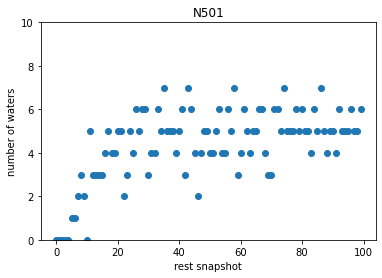

In [17]:
plt.scatter(range(len(neighbors)), [len(frame) for frame in neighbors])
plt.ylabel("number of waters")
plt.xlabel("rest snapshot")
plt.title("N501")
plt.ylim([0, 10])

In [18]:
n501_waters = [len(frame) for frame in neighbors]

In [19]:
timeseries.statisticalInefficiency(n501_waters)


10.72993322915187